In [1]:
import pandas as pd

C:\Users\sripriya\AppData\Local\Temp\ipykernel_15676\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset=pd.read_csv('preplacementdata.csv')

In [3]:
dataset

,Sno,10th %,12th %,Degree %,Mba %,salary,Gender,SSC Board,HSC Board,12th Stream,Degree stream,Work exp,specialisation,status
0,1.0,67.00,91.00,58.00,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
 dataset.isnull().sum()

Sno               0
10th %            0
12th %            0
Degree %          0
Mba %             0
salary            0
Gender            0
SSC Board         0
HSC Board         0
12th Stream       0
Degree stream     0
Work exp          0
specialisation    0
status            0
dtype: int64

In [5]:
import seaborn as sns

C:\Users\sripriya\AppData\Local\Temp\ipykernel_15676\1975902697.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["10th %"])


<Axes: xlabel='10th %', ylabel='Density'>

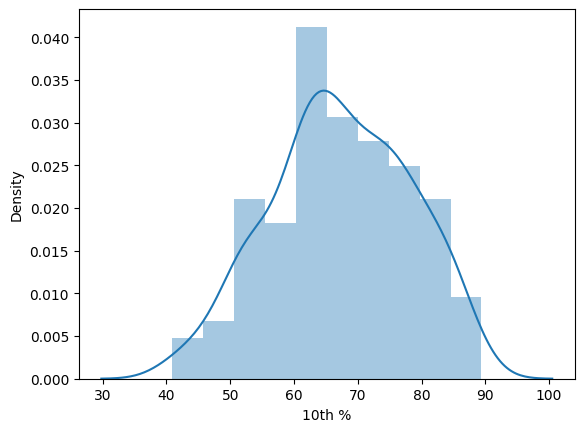

In [6]:
sns.distplot(dataset["10th %"])

In [7]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    #generate a sample
    sample = dataset
    #calculate parameters
    sample_mean =sample.mean()
    sample_std =sample.std()
    print('mean=%.3f,Standard Deviation =%.3f'%(sample_mean, sample_std))
    #define the distribution
    dist=norm(sample_mean,sample_std)

    #sample probabilities for a range of outcomes
    values =[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value)for value in values]
    prob=sum( probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum( probabilities)))
    return prob
    
             
    

mean=67.303,Standard Deviation =10.827
The area between range(60,70):0.3449514151280293


C:\Users\sripriya\AppData\Local\Temp\ipykernel_15676\1318461091.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


0.3449514151280293

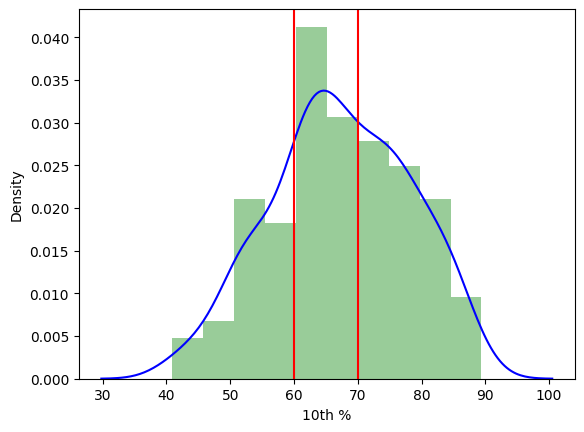

In [8]:
 get_pdf_probability(dataset["10th %"],60,70)

In [9]:
!pip install statsmodels

# cumulative density function

In [13]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset["10th %"])
ecdf(89)

0.9953488372093023

# standard Normal Distribution

In [15]:
def stdNBgraph(dataset):
    #converted to SND
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.displot(z_score,kde=True)
    sum(z_score)/len(z_score)
    #z_score.std()
    

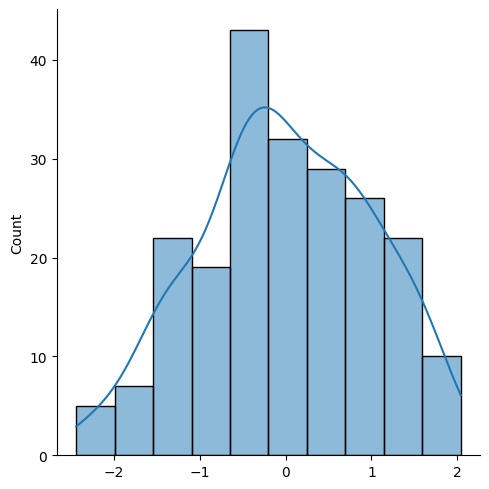

In [16]:
stdNBgraph(dataset["10th %"])